In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error,root_mean_squared_error,r2_score

In [2]:
df=pd.read_csv(r"C:\Users\NTCUONG\notebook\training_LR\training4.csv")
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Ageofhouse,SalePrice
0,0.150095,0.342066,0.245505,0.823709,0.456088,0.456088,0.456088,0.0,0.456088,0.0,...,0.0,0.0,0.0,0.0,0.073461,0.444283,0.456088,0.440378,0.027335,208500
1,0.043704,0.309687,0.275454,0.858742,0.412917,0.412917,0.412917,0.0,0.206458,0.0,...,0.0,0.0,0.0,0.0,0.173726,0.400042,0.412917,0.398694,0.153434,181500
2,0.118371,0.270847,0.200518,0.890162,0.361130,0.000000,0.361130,0.0,0.361130,0.0,...,0.0,0.0,0.0,0.0,0.276877,0.347432,0.361130,0.348691,0.030301,223500
3,0.159663,0.311608,0.203805,0.859956,0.415478,0.000000,0.415478,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.066395,0.402442,0.415478,0.000000,0.453197,140000
4,0.094961,0.218296,0.199566,0.918118,0.291061,0.000000,0.291061,0.0,0.145531,0.0,...,0.0,0.0,0.0,0.0,0.297982,0.275967,0.291061,0.281036,0.027911,250000


In [3]:
corr=df.corr()

In [4]:
df.corr().sort_values("SalePrice",ascending=False).head(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Ageofhouse,SalePrice
SalePrice,-0.187647,-0.404171,-0.150610,0.228495,-0.403474,-0.354273,-0.311037,-0.014314,-0.249109,-0.015982,...,0.041436,0.074595,0.079494,-0.039699,-0.220379,-0.415640,-0.375715,-0.190818,-0.581832,1.000000
Fireplaces,0.063249,0.007837,0.047980,-0.071319,0.006838,-0.066368,-0.018833,0.005340,0.010777,0.010396,...,0.005958,0.152924,0.031778,-0.011221,0.034248,0.000863,0.011667,0.074801,-0.139056,0.296401
MasVnrArea,0.226649,0.045938,0.020590,-0.232372,0.126856,0.070116,0.146934,0.039206,0.104347,-0.038813,...,0.008330,0.047443,-0.020110,-0.039165,0.070193,0.125313,0.093777,0.114912,-0.225699,0.286091
GarageArea,0.338253,0.162839,0.212572,-0.397094,0.355021,0.202603,0.348230,-0.012106,0.255043,-0.071831,...,0.002265,0.024850,-0.028577,-0.072354,0.234028,0.357993,0.259190,0.360551,-0.310870,0.250840
LotArea,-0.863094,-0.755708,-0.218895,1.000000,-0.917599,-0.639649,-0.765542,0.020686,-0.643130,0.009557,...,0.035842,0.031591,0.036059,-0.029195,-0.555556,-0.924604,-0.772368,-0.671901,-0.224720,0.228495
GarageCars,0.423849,0.232367,0.220673,-0.477601,0.425237,0.245790,0.398520,-0.011345,0.296085,-0.071124,...,0.003594,0.017486,-0.032757,-0.082006,0.277124,0.428144,0.324890,0.413761,-0.315702,0.219479
BsmtFinSF1,0.157114,0.096525,0.083294,-0.176603,0.153751,0.039327,0.138310,-0.021591,0.127488,0.063618,...,0.028868,0.072497,0.018856,-0.026515,0.129270,0.151753,0.132957,0.117896,-0.181597,0.209936
TotalBsmtSF,0.306169,0.325522,0.274670,-0.503970,0.455491,0.240865,0.399690,-0.029198,0.330091,-0.018536,...,0.010556,0.062309,-0.020677,-0.087436,0.313648,0.454333,0.346140,0.378087,-0.152333,0.208208
GrLivArea,0.602790,0.411877,0.242027,-0.653633,0.576926,0.373730,0.463320,-0.027909,0.391960,-0.025684,...,-0.018361,0.023221,-0.010039,-0.060111,0.392246,0.574364,0.469275,0.446161,0.065657,0.184438
OpenPorchSF,0.113680,-0.058095,0.053859,-0.105168,0.086041,0.032515,0.098391,0.014226,0.032429,-0.054175,...,-0.021118,0.019464,-0.009159,-0.024226,0.084887,0.083532,0.070389,0.097935,-0.142074,0.184272


In [5]:
def create_df(col_list):
    df_fs=df["SalePrice"]
    for col in col_list:
        df_fs=pd.concat([df[col],df_fs],axis=1)
    return df_fs

In [6]:
model=GradientBoostingRegressor()

In [7]:
def eval(df_fs):
    X_train,X_test,y_train,y_test=train_test_split(df_fs.iloc[:,:-1],df_fs.iloc[:,-1],test_size=0.2,random_state=42)
    model.fit(X_train,y_train)
    y_pre=model.predict(X_test)
    k.append(i)
    mae.append(mean_absolute_error(y_test,y_pre))
    rmse.append(root_mean_squared_error(y_test,y_pre))
    r2.append(r2_score(y_test,y_pre))

### FEATURE SELECTION DEPEND ON CORRELATION MATRIX

plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),cmap='coolwarm')

In [8]:
c=corr.sort_values("SalePrice",ascending=False).head(10).index
c

Index(['SalePrice', 'Fireplaces', 'MasVnrArea', 'GarageArea', 'LotArea',
       'GarageCars', 'BsmtFinSF1', 'TotalBsmtSF', 'GrLivArea', 'OpenPorchSF'],
      dtype='object')

In [9]:
k, mae, rmse, r2 = [], [], [], []
for i in range(10,120):
    c=corr.sort_values("SalePrice",ascending=False).iloc[1:i,:].index
    df_fs=create_df(c)
    eval(df_fs)
statistic_tup={
    "K":k,
    "MAE":mae,
    "RMSE":rmse,
    "r2":r2
}
statistic=pd.DataFrame(statistic_tup)
statistic

,K,MAE,RMSE,r2
0,10,29240.946360,47198.036132,0.709575
1,11,29036.291882,47117.226494,0.710569
2,12,29159.536501,47489.490695,0.705977
3,13,28625.795139,47572.464688,0.704949
4,14,28543.067796,47120.010110,0.710534
...,...,...,...,...
105,115,21391.037115,34010.942807,0.849192
106,116,21285.170133,33826.427150,0.850824
107,117,21213.669602,33740.168933,0.851584
108,118,21379.409955,33989.026738,0.849387


In [10]:
statistic.sort_values("MAE",ascending=True)

,K,MAE,RMSE,r2
62,72,20366.459144,34154.238520,0.847919
63,73,21191.728994,34892.509338,0.841273
107,117,21213.669602,33740.168933,0.851584
96,106,21230.123200,33794.688361,0.851104
103,113,21233.455283,33770.645897,0.851316
...,...,...,...,...
7,17,28711.237712,48514.550735,0.693147
1,11,29036.291882,47117.226494,0.710569
5,15,29039.575901,48356.941294,0.695138
2,12,29159.536501,47489.490695,0.705977


C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_24612\3627608168.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_24612\3627608168.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")


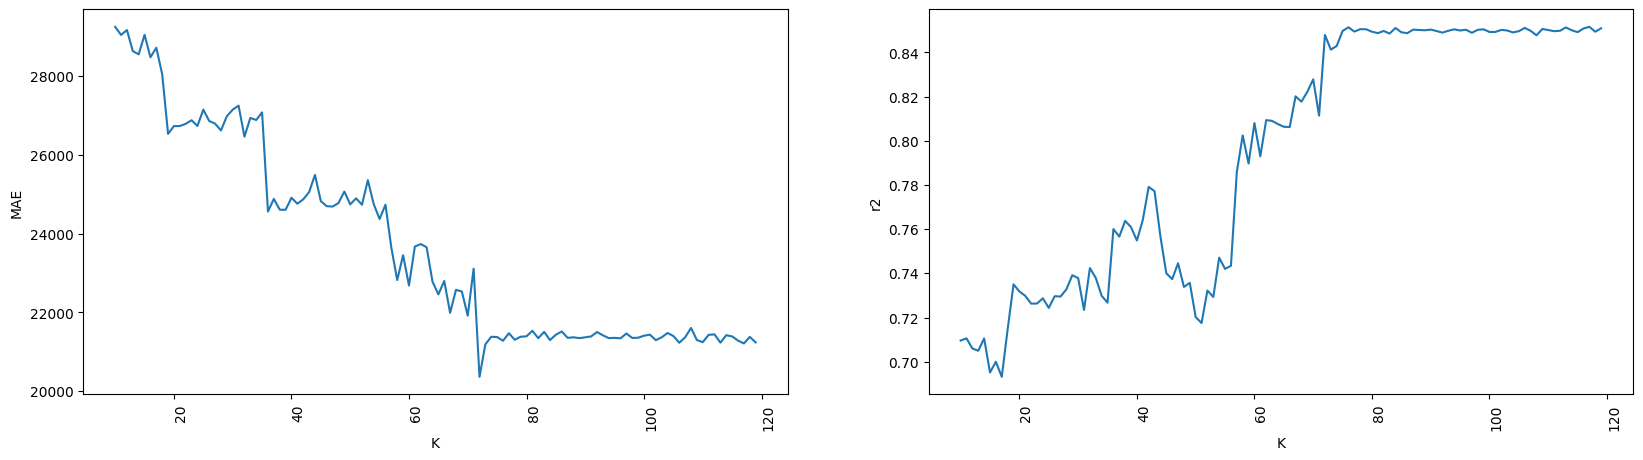

In [11]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1=sns.lineplot(data=statistic,x="K",y="MAE",ax=axes[0])
ax2=sns.lineplot(data=statistic,x="K",y="r2",ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")
plt.show()

### FEATURE SELECTION BY REMOVE FEATURE WITH LOW VARIENCE


### 1.CALCULATE VARIENCE FOR EACH FEATURE

In [12]:
varr=np.var(df)
varr

D:\miniconda\lib\site-packages\numpy\core\fromnumeric.py:3785: FutureWarning: The behavior of DataFrame.var with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return var(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


MSSubClass       3.261390e-02
MSZoning         2.602904e-02
LotFrontage      5.107889e-03
LotArea          2.617374e-02
Street           2.493119e-02
                     ...     
YrSold           2.532877e-02
SaleType         3.044613e-02
SaleCondition    3.442249e-02
Ageofhouse       3.430254e-02
SalePrice        6.306789e+09
Length: 75, dtype: float64

In [13]:
varr.loc[varr > 0.1].index

Index(['SalePrice'], dtype='object')

### 2.USING VarianceThreshold FROM SKLEARN

In [14]:
from sklearn.feature_selection import VarianceThreshold

In [15]:
varr_thresh=VarianceThreshold(threshold=0.1)
varr_thresh.fit_transform(df)
selected_columns = df.columns[varr_thresh.get_support()]
selected_columns

Index(['SalePrice'], dtype='object')

In [16]:
k, mae, rmse, r2 = [], [], [], []
for i in range(100,500):
    varr_thresh=VarianceThreshold(threshold=i/100000)
    varr_thresh.fit_transform(df.iloc[:,:-1])
    selected_columns = df.iloc[:,:-1].columns[varr_thresh.get_support()]
    df_fs=create_df(selected_columns)
    eval(df_fs)
statistic_tup={
    "K":k,
    "MAE":mae,
    "RMSE":rmse,
    "r2":r2
}
statistic=pd.DataFrame(statistic_tup)
statistic

,K,MAE,RMSE,r2
0,100,21182.303007,33736.084070,0.851620
1,101,21451.923661,33965.062778,0.849599
2,102,21299.156679,33881.881203,0.850335
3,103,21355.728644,33903.325812,0.850145
4,104,21500.712958,33991.730622,0.849363
...,...,...,...,...
395,495,21649.096445,34360.653087,0.846075
396,496,21512.281403,34275.523020,0.846837
397,497,21471.844672,34206.512763,0.847453
398,498,21472.790213,34178.810511,0.847700


In [17]:
statistic.sort_values("MAE",ascending=True)

,K,MAE,RMSE,r2
9,109,21167.895035,33762.081110,0.851391
0,100,21182.303007,33736.084070,0.851620
172,272,21195.647990,34022.853964,0.849087
18,118,21209.125418,33745.253621,0.851539
177,277,21225.373226,34031.345087,0.849011
...,...,...,...,...
313,413,21692.011120,34433.804746,0.845419
277,377,21699.266060,34376.600413,0.845932
365,465,21707.803792,34409.382296,0.845638
384,484,21716.611872,34306.146266,0.846563


C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_24612\873788412.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_24612\873788412.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")


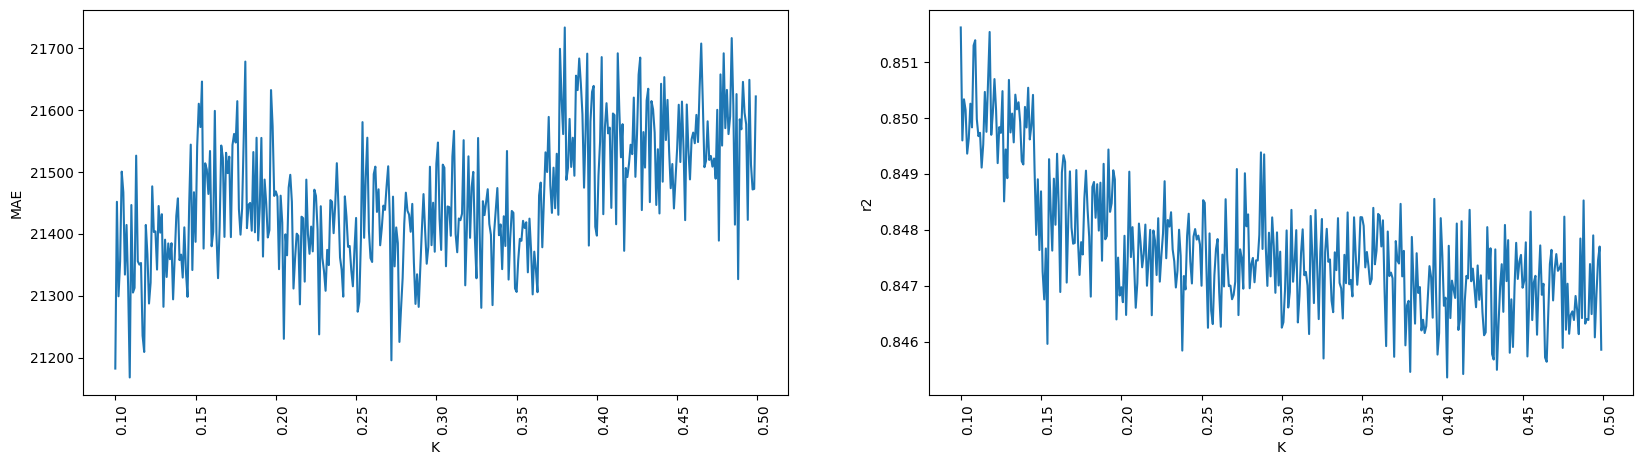

In [18]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1=sns.lineplot(data=statistic,x=statistic["K"]/1000,y="MAE",ax=axes[0])
ax2=sns.lineplot(data=statistic,x=statistic["K"]/1000,y="r2",ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")
plt.show()

### Univariate feature selection


### Statistic function (r_regression, f_regression, mutual_info_regression)

### 1. r_regression


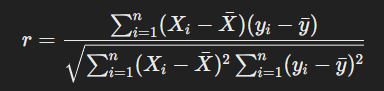

### Using numpy

In [19]:
def similitary_score(x,y):
    x_avg=np.average(x)
    y_avg=np.average(y)
    up=np.sum((x-x_avg)*(y-y_avg))
    down=np.sqrt(np.sum((x-x_avg)**2)*np.sum((y-y_avg)**2))
    return up/down

In [20]:
print(similitary_score(df["OverallQual"],df["SalePrice"]))

0.030435711798881705


In [21]:
top_feature=[]
for col in df.columns:
    score=similitary_score(df[col],df["SalePrice"])
    if col != "SalePrice" and score > 0.6:
        top_feature.append([col,score])
top_feature

[]

### Using sklearn

In [22]:
from sklearn.feature_selection import r_regression
from sklearn.feature_selection import SelectKBest
# for i in range(5,21):
fs=SelectKBest(r_regression,k=6)
fl_df=fs.fit_transform(df.iloc[:,:-1],df.iloc[:,-1])
# selected=df.columns[fs.get_support()]
fs.get_feature_names_out()

array(['LotArea', 'MasVnrArea', 'BsmtFinSF1', 'Fireplaces', 'GarageCars',
       'GarageArea'], dtype=object)

In [23]:
k, mae, rmse, r2 = [], [], [], []

for i in range(5,120):
    fs=SelectKBest(r_regression,k=i)
    fl_df=fs.fit_transform(df.iloc[:,:-1],df.iloc[:,-1])
    c=fs.get_feature_names_out()
    df_fs=create_df(c)
    eval(df_fs)
statistic_tup={
    "K":k,
    "MAE":mae,
    "RMSE":rmse,
    "r2":r2
}
statistic=pd.DataFrame(statistic_tup)
statistic.to_csv("r_regression_label_enc.csv")
statistic


D:\miniconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=75 is greater than n_features=74. All the features will be returned.
  warnings.warn(
D:\miniconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=76 is greater than n_features=74. All the features will be returned.
  warnings.warn(
D:\miniconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=77 is greater than n_features=74. All the features will be returned.
  warnings.warn(
D:\miniconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=78 is greater than n_features=74. All the features will be returned.
  warnings.warn(
D:\miniconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=79 is greater than n_features=74. All the features will be returned.
  warnings.warn(
D:\miniconda\lib\site-packages\sklearn\feature_selection\_un

,K,MAE,RMSE,r2
0,5,37353.587534,61028.505537,0.514430
1,6,38339.128134,60848.169128,0.517296
2,7,36082.363034,59920.206409,0.531906
3,8,29676.093946,48826.550256,0.689188
4,9,29156.850874,46579.158084,0.717141
...,...,...,...,...
110,115,21505.514121,34007.515356,0.849223
111,116,21538.003334,34063.371151,0.848727
112,117,21434.229773,34028.057971,0.849040
113,118,21370.865931,34014.547683,0.849160


In [24]:
statistic.sort_values("MAE",ascending=True)

,K,MAE,RMSE,r2
66,71,20553.948549,34509.879044,0.844735
83,88,21130.667620,33719.351062,0.851767
67,72,21262.245573,34951.345799,0.840737
91,96,21290.383434,33873.984662,0.850404
101,106,21292.158655,33838.133479,0.850721
...,...,...,...,...
6,11,29249.177935,47631.962006,0.704210
3,8,29676.093946,48826.550256,0.689188
2,7,36082.363034,59920.206409,0.531906
0,5,37353.587534,61028.505537,0.514430


C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_24612\3627608168.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_24612\3627608168.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")


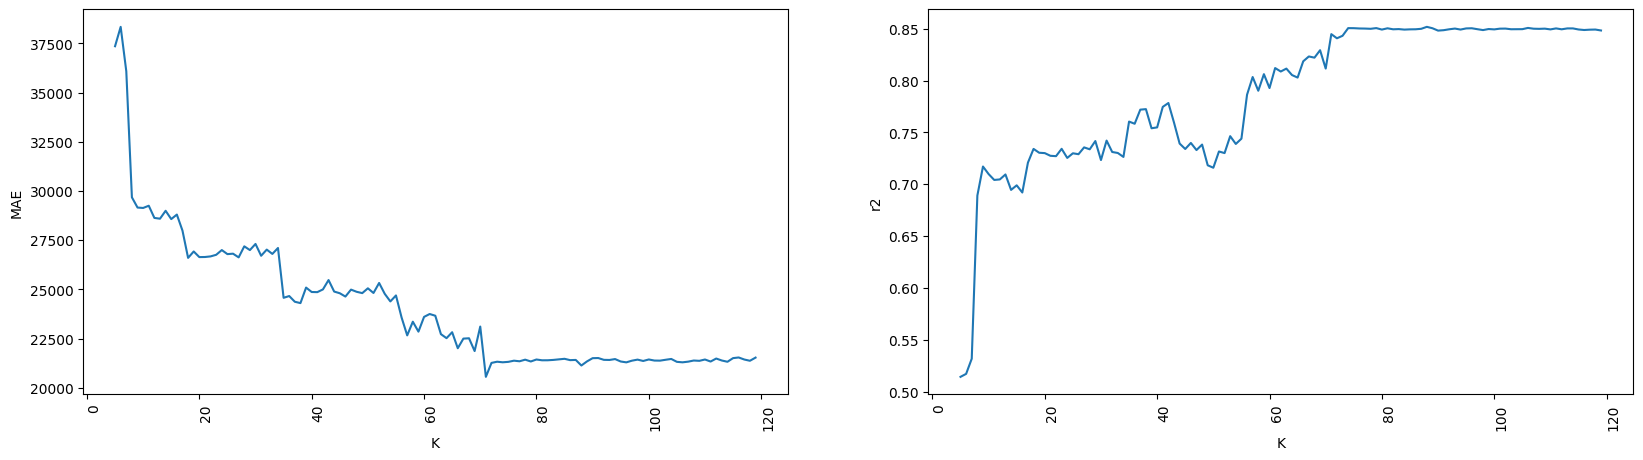

In [25]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1=sns.lineplot(data=statistic,x="K",y="MAE",ax=axes[0])
ax2=sns.lineplot(data=statistic,x="K",y="r2",ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")
plt.show()

### 2.f_regression

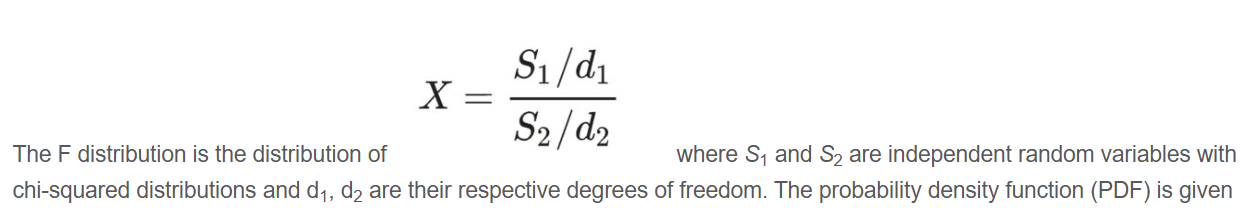

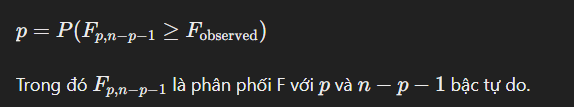

In [26]:
from sklearn.feature_selection import f_regression

In [27]:
k, mae, rmse, r2 = [], [], [], []
for i in range(5,120):
    fs=SelectKBest(f_regression,k=i)
    fl_df=fs.fit_transform(df.iloc[:,:-1],df.iloc[:,-1])
    c=fs.get_feature_names_out()
    df_fs=create_df(c)
    eval(df_fs)
statistic_tup={
    "K":k,
    "MAE":mae,
    "RMSE":rmse,
    "r2":r2
}
statistic=pd.DataFrame(statistic_tup)
statistic.to_csv("f_regression_label_enc.csv")
statistic

D:\miniconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=75 is greater than n_features=74. All the features will be returned.
  warnings.warn(
D:\miniconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=76 is greater than n_features=74. All the features will be returned.
  warnings.warn(
D:\miniconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=77 is greater than n_features=74. All the features will be returned.
  warnings.warn(
D:\miniconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=78 is greater than n_features=74. All the features will be returned.
  warnings.warn(
D:\miniconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=79 is greater than n_features=74. All the features will be returned.
  warnings.warn(
D:\miniconda\lib\site-packages\sklearn\feature_selection\_un

,K,MAE,RMSE,r2
0,5,32659.610524,49510.367708,0.680421
1,6,33108.407885,49273.639762,0.683470
2,7,32791.165862,48729.086235,0.690427
3,8,32283.556140,48120.382243,0.698113
4,9,31719.035082,47271.348874,0.708672
...,...,...,...,...
110,115,21412.321859,33955.554659,0.849683
111,116,21337.535572,33865.945982,0.850475
112,117,21537.638933,34035.675534,0.848973
113,118,21495.718397,33927.068369,0.849935


In [28]:
statistic.sort_values("MAE",ascending=True)

,K,MAE,RMSE,r2
43,48,20516.365511,32373.942254,0.863360
42,47,20886.753427,32679.281100,0.860771
41,46,20961.321851,33009.558856,0.857942
60,65,21125.648022,33482.084000,0.853846
56,61,21175.252874,33408.213467,0.854490
...,...,...,...,...
4,9,31719.035082,47271.348874,0.708672
3,8,32283.556140,48120.382243,0.698113
0,5,32659.610524,49510.367708,0.680421
2,7,32791.165862,48729.086235,0.690427


C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_24612\3627608168.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_24612\3627608168.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")


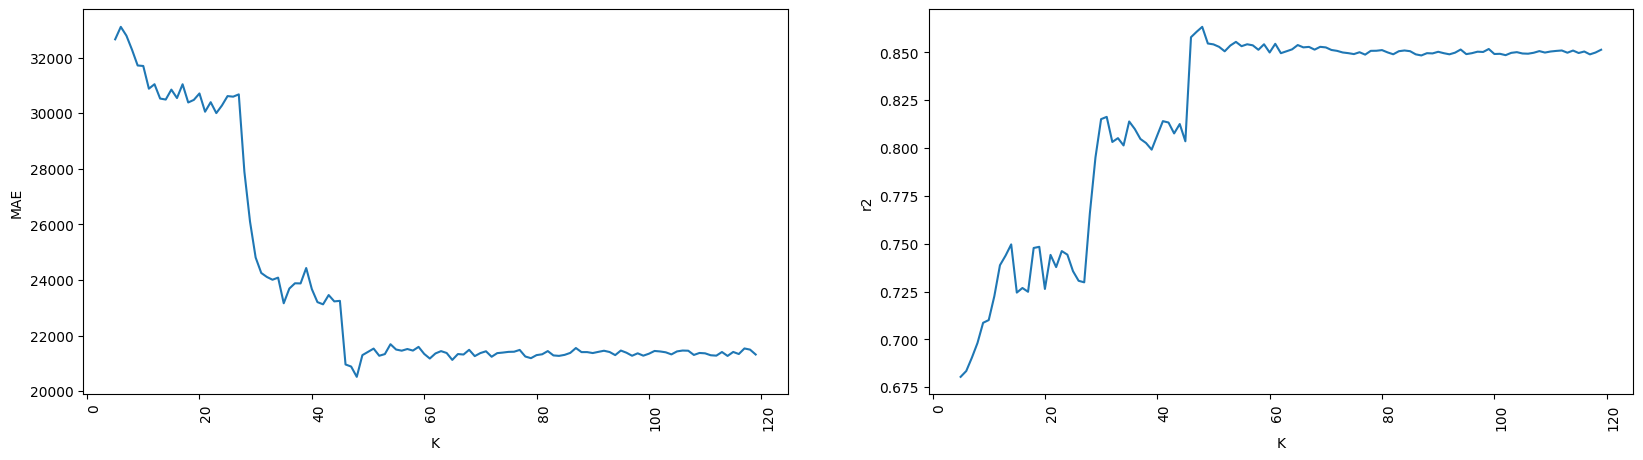

In [29]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1=sns.lineplot(data=statistic,x="K",y="MAE",ax=axes[0])
ax2=sns.lineplot(data=statistic,x="K",y="r2",ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")
plt.show()

### 3.Mutual infomation

### Fomula

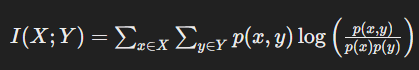

### Mesure dependency of 2 variable X,Y

### KDE method (Estimate Probability Density Function)

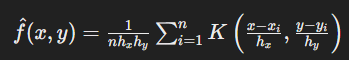

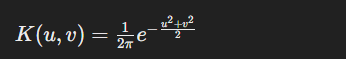

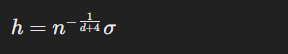

In [30]:
all_col=df.columns
all_col

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPor

In [31]:
from sklearn.feature_selection import mutual_info_regression

In [32]:
k, mae, rmse, r2 = [], [], [], []
for i in range(5,120):
    fs=SelectKBest(mutual_info_regression,k=i)
    fl_df=fs.fit_transform(df.iloc[:,:-1],df.iloc[:,-1])
    c=fs.get_feature_names_out()
    df_fs=create_df(c)
    eval(df_fs)
statistic_tup={
    "K":k,
    "MAE":mae,
    "RMSE":rmse,
    "r2":r2
}
statistic=pd.DataFrame(statistic_tup)
statistic

D:\miniconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=75 is greater than n_features=74. All the features will be returned.
  warnings.warn(
D:\miniconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=76 is greater than n_features=74. All the features will be returned.
  warnings.warn(
D:\miniconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=77 is greater than n_features=74. All the features will be returned.
  warnings.warn(
D:\miniconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=78 is greater than n_features=74. All the features will be returned.
  warnings.warn(
D:\miniconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=79 is greater than n_features=74. All the features will be returned.
  warnings.warn(
D:\miniconda\lib\site-packages\sklearn\feature_selection\_un

,K,MAE,RMSE,r2
0,5,32657.841108,49510.320925,0.680421
1,6,33118.131960,49374.279731,0.682175
2,7,32794.121779,48738.545555,0.690307
3,8,31646.918967,46791.913160,0.714551
4,9,30705.877736,45479.643342,0.730338
...,...,...,...,...
110,115,21353.392428,33945.391344,0.849773
111,116,21490.927698,33983.789756,0.849433
112,117,21462.275955,34031.373514,0.849011
113,118,21430.849873,34040.543179,0.848930


In [33]:
statistic.to_csv("mutual_infomation_label_enc.csv")

In [34]:
statistic.sort_values("MAE",ascending=True)

,K,MAE,RMSE,r2
45,50,20725.584205,32400.278535,0.863138
44,49,20781.205187,32873.866186,0.859108
43,48,20883.270506,33161.468805,0.856632
48,53,21232.709186,33223.644257,0.856093
103,108,21241.768969,33780.640972,0.851228
...,...,...,...,...
5,10,31033.100993,45099.836494,0.734823
3,8,31646.918967,46791.913160,0.714551
0,5,32657.841108,49510.320925,0.680421
2,7,32794.121779,48738.545555,0.690307


C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_24612\3627608168.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_24612\3627608168.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")


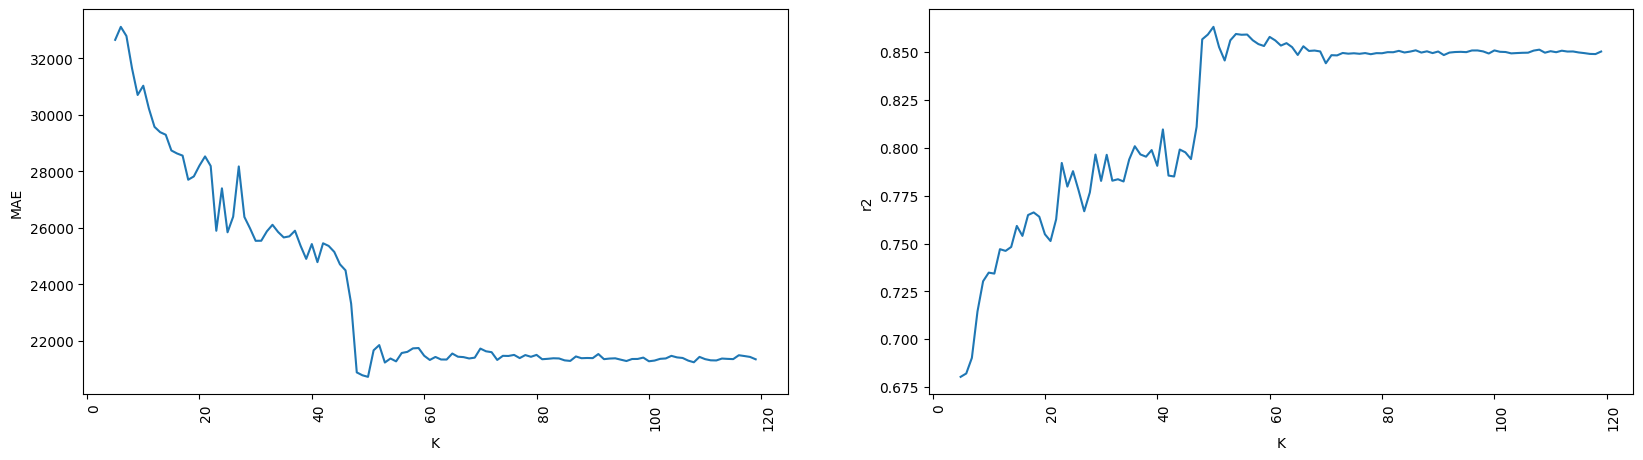

In [35]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1=sns.lineplot(data=statistic,x="K",y="MAE",ax=axes[0])
ax2=sns.lineplot(data=statistic,x="K",y="r2",ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")
plt.show()

### RFE (Recursive feature elimination)

df

from sklearn.feature_selection import RFE,RFECV
rfe=RFE(estimator=model,n_features_to_select=5)
rfe.fit(df.iloc[:,:-1],df.iloc[:,-1])
rfe.get_feature_names_out()

k, mae, rmse, r2 = [], [], [], []
for i in range(10,50):
    rfe=RFE(estimator=model,n_features_to_select=i)
    rfe.fit(df.iloc[:,:-1],df.iloc[:,-1])
    c = df.iloc[:,:-1].columns[rfe.support_]
    df_fs=create_df(c)
    eval(df_fs)
statistic_tup={
    "K":k,
    "MAE":mae,
    "RMSE":rmse,
    "r2":r2
}
statistic=pd.DataFrame(statistic_tup)
statistic

statistic.to_csv("RFE.csv")

statistic=pd.read_csv("RFE.csv")

fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1=sns.lineplot(data=statistic,x="K",y="MAE",ax=axes[0])
ax2=sns.lineplot(data=statistic,x="K",y="r2",ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")
plt.show()

k, mae, rmse, r2 = [], [], [], []
for i in range(10,15):
    rfe=RFECV(estimator=model,min_features_to_select=i,cv=5)
    rfe.fit(df.iloc[:,:-1],df.iloc[:,-1])
    c = df.iloc[:,:-1].columns[rfe.support_]
    df_fs=create_df(c)
    eval(df_fs)
statistic_tup={
    "K":k,
    "MAE":mae,
    "RMSE":rmse,
    "r2":r2
}
statistic=pd.DataFrame(statistic_tup)
statistic

fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1=sns.lineplot(data=statistic,x="K",y="MAE",ax=axes[0])
ax2=sns.lineplot(data=statistic,x="K",y="r2",ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")
plt.show()

statistic.to_csv("RFECV.csv")

In [36]:
r=pd.read_csv("r_regression_label_enc.csv")
r=r.iloc[:,1:]
r

,K,MAE,RMSE,r2
0,5,35890.359891,50901.949232,0.662204
1,6,34660.461597,50002.241821,0.674039
2,7,31564.708773,45860.413561,0.725803
3,8,30212.362959,41950.167250,0.770568
4,9,28986.486315,40015.679080,0.791240
...,...,...,...,...
110,115,21814.597153,31668.144146,0.869253
111,116,21786.549622,31645.795929,0.869438
112,117,22088.993428,31976.786881,0.866692
113,118,22124.740073,32005.206735,0.866455


In [37]:
f=pd.read_csv("f_regression_label_enc.csv")
f=f.iloc[:,1:]
f

,K,MAE,RMSE,r2
0,5,34354.505424,51440.370481,0.655020
1,6,33572.804895,50895.643927,0.662287
2,7,31998.620106,47606.662232,0.704524
3,8,31284.920167,46590.490643,0.717004
4,9,31376.756052,46259.713117,0.721008
...,...,...,...,...
110,115,19547.763778,30557.023160,0.878267
111,116,19783.132247,31223.937471,0.872895
112,117,19642.594200,30488.959965,0.878809
113,118,19589.283325,30425.147489,0.879315


In [38]:
mutual=pd.read_csv("mutual_infomation_label_enc.csv")
mutual=mutual.iloc[:,1:]
mutual

,K,MAE,RMSE,r2
0,5,32657.841108,49510.320925,0.680421
1,6,33118.131960,49374.279731,0.682175
2,7,32794.121779,48738.545555,0.690307
3,8,31646.918967,46791.913160,0.714551
4,9,30705.877736,45479.643342,0.730338
...,...,...,...,...
110,115,21353.392428,33945.391344,0.849773
111,116,21490.927698,33983.789756,0.849433
112,117,21462.275955,34031.373514,0.849011
113,118,21430.849873,34040.543179,0.848930


In [39]:
joint=pd.merge(r,f,how='inner',on="K")
joint

,K,MAE_x,RMSE_x,r2_x,MAE_y,RMSE_y,r2_y
0,5,35890.359891,50901.949232,0.662204,34354.505424,51440.370481,0.655020
1,6,34660.461597,50002.241821,0.674039,33572.804895,50895.643927,0.662287
2,7,31564.708773,45860.413561,0.725803,31998.620106,47606.662232,0.704524
3,8,30212.362959,41950.167250,0.770568,31284.920167,46590.490643,0.717004
4,9,28986.486315,40015.679080,0.791240,31376.756052,46259.713117,0.721008
...,...,...,...,...,...,...,...
110,115,21814.597153,31668.144146,0.869253,19547.763778,30557.023160,0.878267
111,116,21786.549622,31645.795929,0.869438,19783.132247,31223.937471,0.872895
112,117,22088.993428,31976.786881,0.866692,19642.594200,30488.959965,0.878809
113,118,22124.740073,32005.206735,0.866455,19589.283325,30425.147489,0.879315


In [40]:
joint=pd.merge(joint,mutual,on="K",how="inner")
joint

,K,MAE_x,RMSE_x,r2_x,MAE_y,RMSE_y,r2_y,MAE,RMSE,r2
0,5,35890.359891,50901.949232,0.662204,34354.505424,51440.370481,0.655020,32657.841108,49510.320925,0.680421
1,6,34660.461597,50002.241821,0.674039,33572.804895,50895.643927,0.662287,33118.131960,49374.279731,0.682175
2,7,31564.708773,45860.413561,0.725803,31998.620106,47606.662232,0.704524,32794.121779,48738.545555,0.690307
3,8,30212.362959,41950.167250,0.770568,31284.920167,46590.490643,0.717004,31646.918967,46791.913160,0.714551
4,9,28986.486315,40015.679080,0.791240,31376.756052,46259.713117,0.721008,30705.877736,45479.643342,0.730338
...,...,...,...,...,...,...,...,...,...,...
110,115,21814.597153,31668.144146,0.869253,19547.763778,30557.023160,0.878267,21353.392428,33945.391344,0.849773
111,116,21786.549622,31645.795929,0.869438,19783.132247,31223.937471,0.872895,21490.927698,33983.789756,0.849433
112,117,22088.993428,31976.786881,0.866692,19642.594200,30488.959965,0.878809,21462.275955,34031.373514,0.849011
113,118,22124.740073,32005.206735,0.866455,19589.283325,30425.147489,0.879315,21430.849873,34040.543179,0.848930


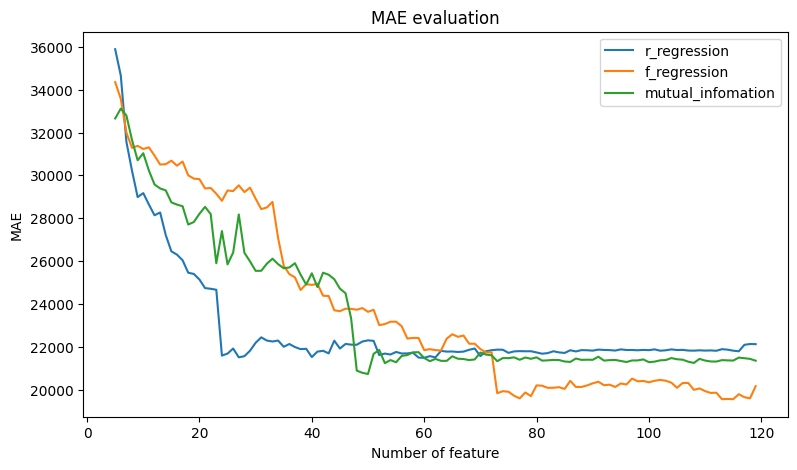

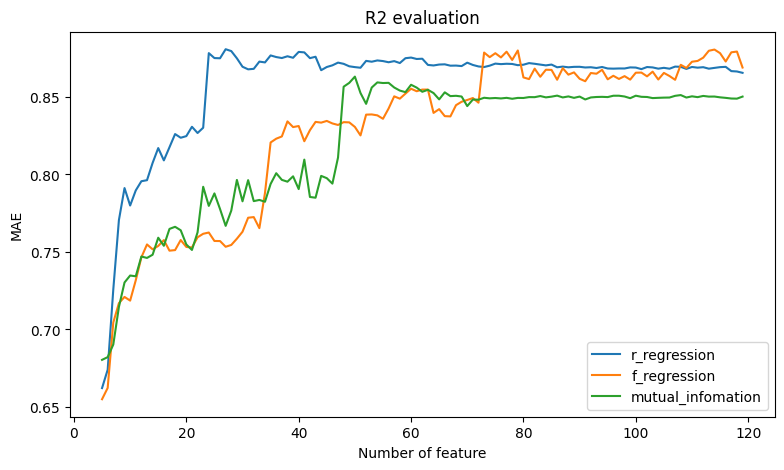

In [41]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(joint["K"],joint["MAE_x"],label="r_regression")
plt.plot(joint["K"],joint["MAE_y"],label="f_regression")
plt.plot(joint["K"],joint["MAE"],label="mutual_infomation")
plt.xlabel("Number of feature")
plt.ylabel("MAE")
plt.title("MAE evaluation") 
plt.legend()
plt.figure(figsize=(20,5))
plt.subplot(1,2,2)
plt.plot(joint["K"],joint["r2_x"],label="r_regression")
plt.plot(joint["K"],joint["r2_y"],label="f_regression")
plt.plot(joint["K"],joint["r2"],label="mutual_infomation")
plt.xlabel("Number of feature")
plt.ylabel("MAE")
plt.title("R2 evaluation") 
plt.legend()